# Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

# Problem Statement

In [ ]:
To predict the price by using various independent variables:
    Dependent Variable : Price
    Independent Variable:  'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'

# Data Gathering

In [2]:
boston=load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['PRICE']=boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# EDA Exploratory Data Analysis

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Feature Engineering

# Fearute Selection

In [ ]:
1. Linearity
2. No Multicillinearity (VIF)

In [8]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [9]:
# sns.pairplot(boston_df.corr())

<AxesSubplot:>

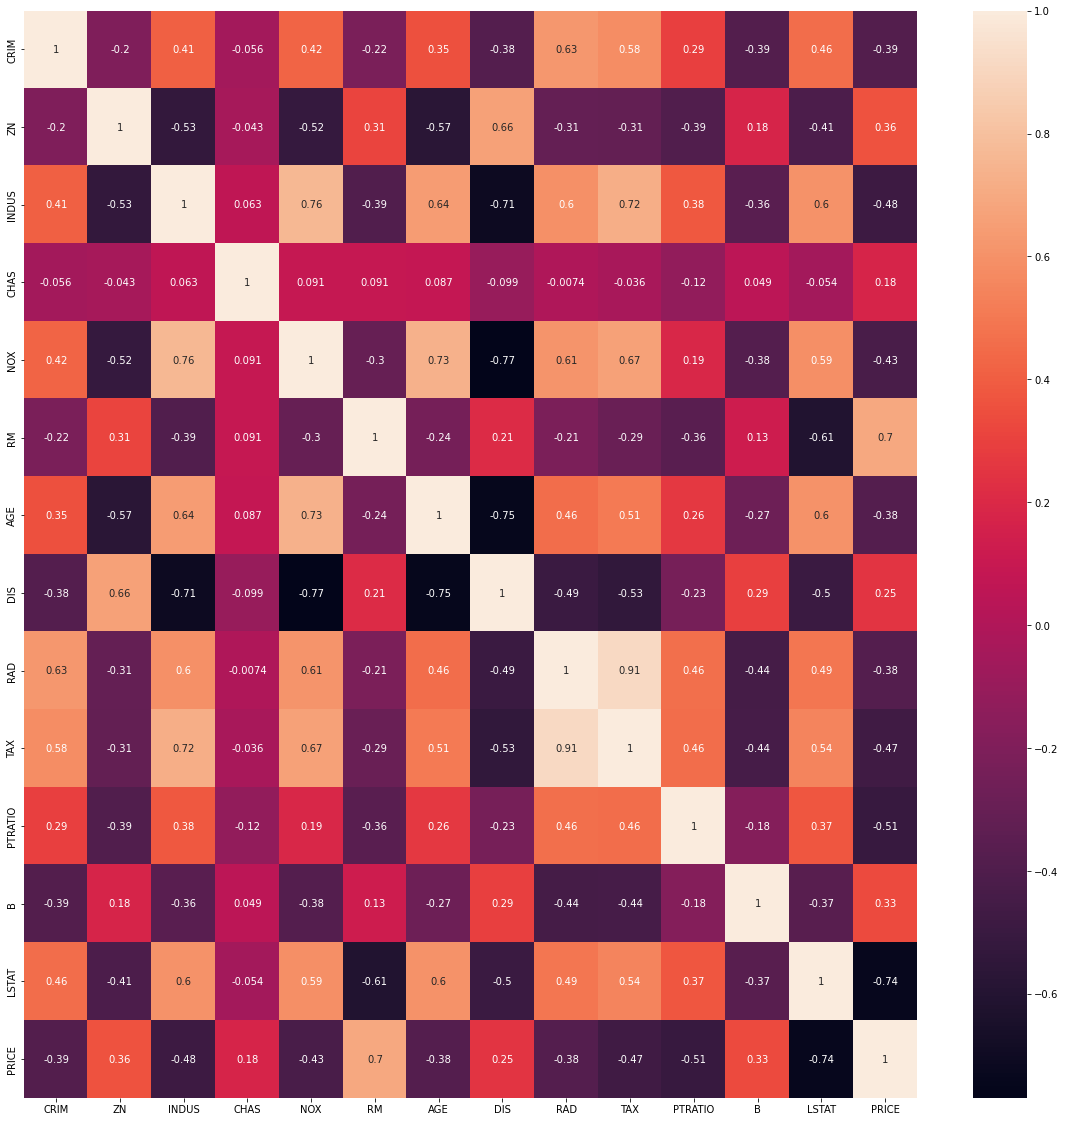

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(boston_df.corr(),annot=True)

<AxesSubplot:>

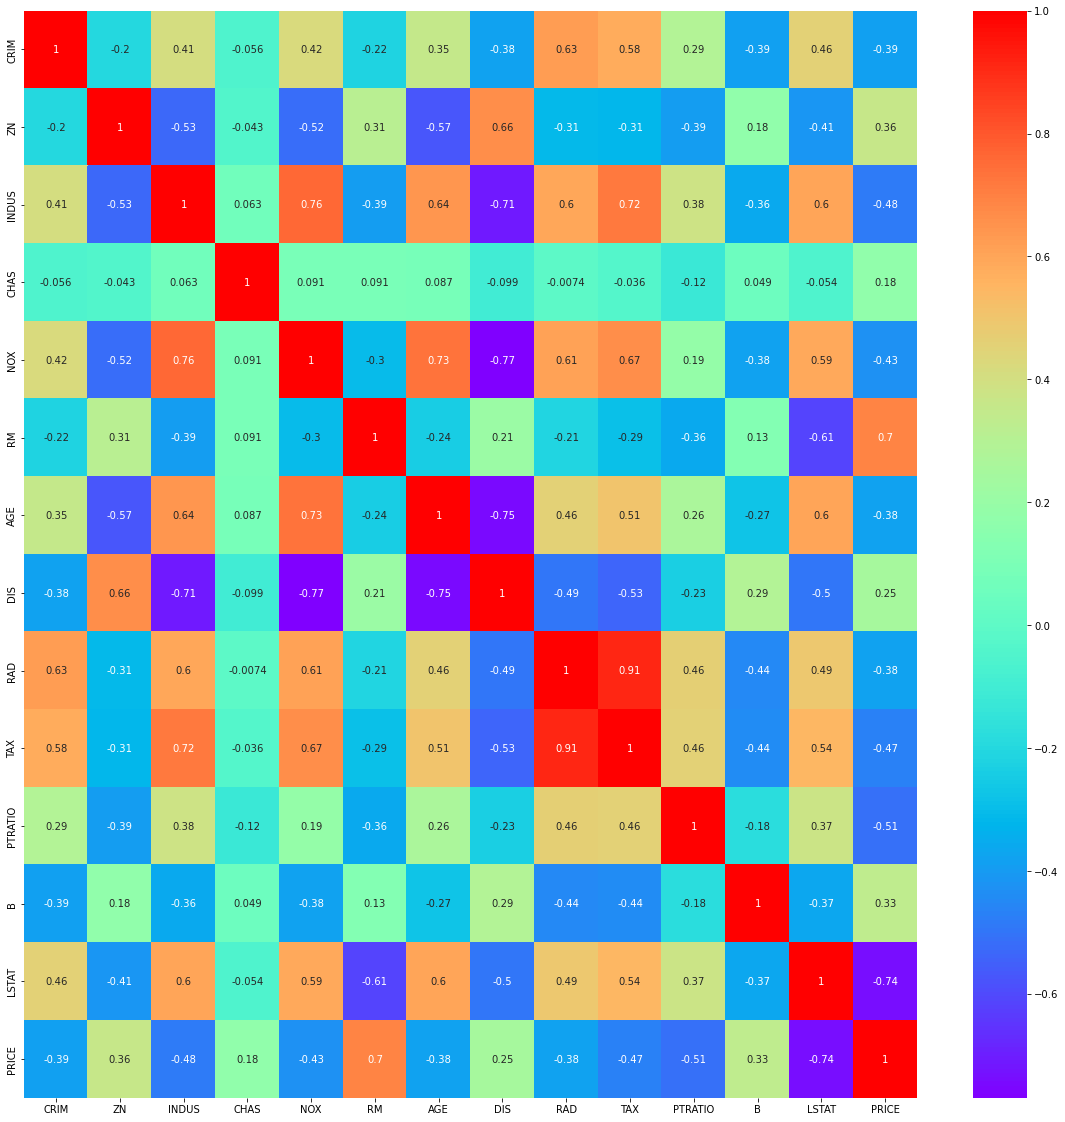

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(boston_df.corr(),annot=True,cmap='rainbow')

# No Multicolinearity

In [ ]:
VIF >> variance inflation factor

In [12]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [13]:
df1=boston_df.drop('PRICE',axis=1)
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


<AxesSubplot:>

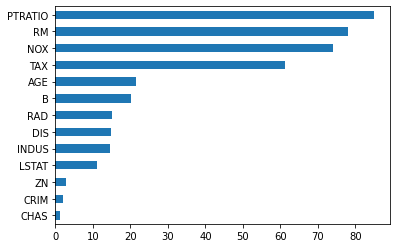

In [14]:
vif_list=[]

for i in range(df1.shape[1]):
    vif=variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
    
    
s1=pd.Series(vif_list,index=df1.columns)
s1.sort_values().plot(kind='barh')

# Train Test Split

In [15]:
x=boston_df.drop('PRICE',axis=1)
y=boston_df['PRICE']


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [17]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77
455,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13
60,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8.0,284.0,19.7,395.11,13.15
213,0.14052,0.0,10.59,0.0,0.489,6.375,32.3,3.9454,4.0,277.0,18.6,385.81,9.38


In [18]:
y_train

220    26.7
71     21.7
240    22.0
6      22.9
417    10.4
       ... 
323    18.5
192    36.4
117    19.2
47     16.6
172    23.1
Name: PRICE, Length: 404, dtype: float64

In [19]:
y_test

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
       ... 
56     24.7
455    14.1
60     18.7
213    28.1
108    19.8
Name: PRICE, Length: 102, dtype: float64

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


# Model Training

In [21]:
linear_reg_model=LinearRegression()
linear_reg_model.fit(x_train,y_train)

LinearRegression()

In [22]:
linear_reg_model.coef_

array([-1.19443447e-01,  4.47799511e-02,  5.48526168e-03,  2.34080361e+00,
       -1.61236043e+01,  3.70870901e+00, -3.12108178e-03, -1.38639737e+00,
        2.44178327e-01, -1.09896366e-02, -1.04592119e+00,  8.11010693e-03,
       -4.92792725e-01])

In [23]:
linear_reg_model.intercept_

38.091694926302324

In [24]:
mc=zip(list(boston_df.columns),list(linear_reg_model.coef_))
list(mc)

[('CRIM', -0.11944344700245645),
 ('ZN', 0.044779951066509005),
 ('INDUS', 0.005485261681776529),
 ('CHAS', 2.3408036062421087),
 ('NOX', -16.12360431542963),
 ('RM', 3.708709012219164),
 ('AGE', -0.0031210817807368505),
 ('DIS', -1.3863973702786736),
 ('RAD', 0.24417832698880754),
 ('TAX', -0.010989636563080059),
 ('PTRATIO', -1.045921188745974),
 ('B', 0.008110106932704822),
 ('LSTAT', -0.49279272450470757)]

In [25]:
## Model Evaluation on Testing Data
y_pred=linear_reg_model.predict(x_test)


mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

r2=linear_reg_model.score(x_test,y_test)  #Without prediction
print("R2:",r2)

r_squared_value=r2_score(y_test,y_pred)  #with prediction
print("R Squared Value:",r_squared_value)

adj_r2=1-(((1-r2)*(x_test.shape[0])-1))/(x_test.shape[0]-x_test.shape[1]-1)

print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  33.448979997676474
Root Mean Squared Error:  5.78350931508513
Mean Absolute Error: 3.842909220444504
R2: 0.5892223849182514
R Squared Value: 0.5892223849182514
Adjusted R2 Score: 0.5352350370643368


In [26]:
## Model Evaluation on Training Data

y_pred_train=linear_reg_model.predict(x_train)


mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error: ",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error:",mae)

r2=linear_reg_model.score(x_train,y_train)  #Without prediction
print("R2:",r2)

r_squared_value=r2_score(y_train,y_pred_train)  #with prediction
print("R Squared Value:",r_squared_value)

adj_r2=1-(((1-r2)*(x_train.shape[0])-1))/(x_train.shape[0]-x_train.shape[1]-1)

print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  19.32647020358573
Root Mean Squared Error:  4.396188144698282
Mean Absolute Error: 3.103156396579434
R2: 0.7730135569264233
R Squared Value: 0.7730135569264233
Adjusted R2 Score: 0.7674294282007051


# Assumptions of linear regression

In [ ]:
1. Linearity
2. No multicollinearity
3. Normality of Residuals
4. Homoscedasticity

# Normality of Residual

In [ ]:
Residual >> Ya - Yp

In [ ]:
Residuals should be normally distributed

1. kdeplot
2. Hypothesis Testing:
    1. Shapiro
    2. KsTest
    3. normaltest
3. QQ- plot
4. Skewness of Residual (skew =0 >>> Data is normally distributed)

In [30]:
Residual= y_train - y_pred_train
Residual

220   -5.856927
71    -0.227095
240   -5.543826
6     -0.703188
417    3.828090
         ...   
323   -0.994951
192    3.073636
117   -4.596208
47    -1.858353
172   -0.149181
Name: PRICE, Length: 404, dtype: float64

# 1. kdeplot

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

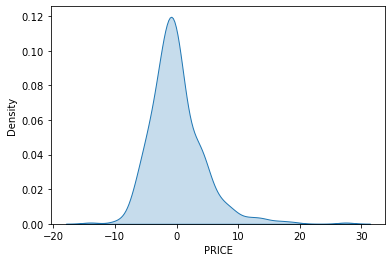

In [31]:
sns.kdeplot(Residual,fill=True)

C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

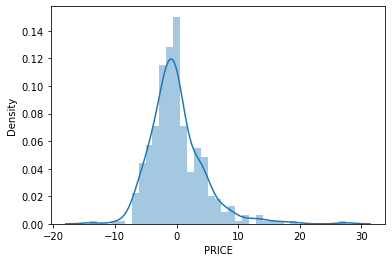

In [32]:
sns.distplot(Residual)

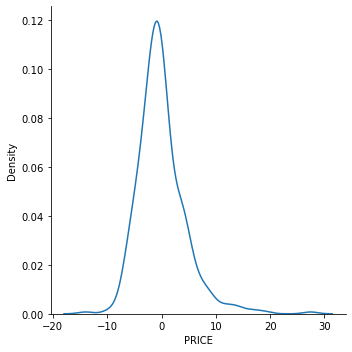

In [35]:
sns.displot(Residual,kind="kde")

<AxesSubplot:xlabel='AGE', ylabel='Density'>

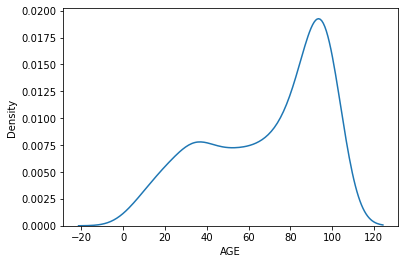

In [36]:
sns.kdeplot(boston_df['AGE'])

# Skewness

In [ ]:
Positive Skewness >> Tail of distribution is longer towards right hand side
Negative Skewness >> Tail of distribution is longer towards left hand side
Symmetrical Data

-0.5 to +0.5  >>> Symmetrical Distribution(-0.4,0,0.1,0.3)
-1 to -0.5    >>> negatively skewed distribution (-0.6,-0.9)
skew < -1     >>> Highly Negative skewed distribution(-1,-1.2,-1.4)

+0.5 to 1     >> positively skewed distribution  >>> (+0.6,0.8)
skew > +1  >>> Highly Positive skewed distribution (+1.1,+1.3)

<AxesSubplot:xlabel='AGE', ylabel='Density'>

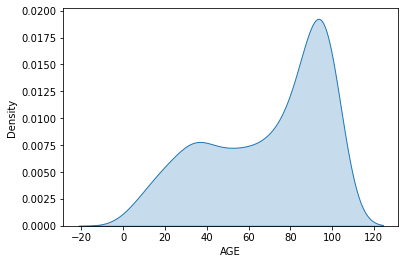

In [37]:
sns.kdeplot(boston_df['AGE'],fill=True)

In [38]:
mean=boston_df['AGE'].mean()
print('Mean is : ', mean)

median=boston_df['AGE'].median()
print('Median is : ', median)

mode=boston_df['AGE'].mode()[0]
print('Mode is : ', mode)

skew=boston_df['AGE'].skew()
print('Skewnesse is : ', skew)

Mean is :  68.57490118577078
Median is :  77.5
Mode is :  100.0
Skewnesse is :  -0.5989626398812962


<AxesSubplot:xlabel='NOX', ylabel='Density'>

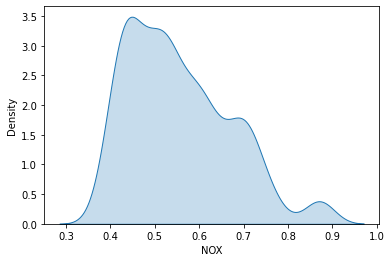

In [39]:
sns.kdeplot(boston_df['NOX'],fill=True)

In [40]:
mean=boston_df['NOX'].mean()
print('Mean is : ', mean)

median=boston_df['NOX'].median()
print('Median is : ', median)

mode=boston_df['NOX'].mode()[0]
print('Mode is : ', mode)

skew=boston_df['NOX'].skew()
print('Skewnesse is : ', skew)

Mean is :  0.5546950592885372
Median is :  0.538
Mode is :  0.538
Skewnesse is :  0.7293079225348787


In [41]:
from scipy.stats import skew

In [42]:
skewness=skew(boston_df['AGE'])
print('Skewness of data is',skewness)

Skewness of data is -0.5971855948016143


In [43]:
Residual.mean()

2.471070652829061e-15

In [44]:
Residual.median()

-0.4967912313300422

In [45]:
Residual.mode()[0]

-13.98524905235778

In [46]:
skewness=skew(Residual)
print('Skewness of data is',skewness)

Skewness of data is 1.4696164031530132


# 2. Hypothesis Testing

In [ ]:
Null Hypothesis >> Data is normally distributed
Alternate Hypothesis >> Data is not normally distributed

p_val Range is >>> 0 to 1

0.05 or 5% is the significant value in hypothesis testing
p_val >=0.05   >>>> we are accepting the null hypothesis
p_val < 0.05   >>>> we are accepting the Alternate hypothesis

p_val >=0.05   >>>> null hypothesis is True
p_val < 0.05   >>>> Null hypothesis is False/ Alternate Hypothesis is True

In [ ]:
1. Shapiro
2. KsTest
3. normaltest

## 2.1 Shapiro

In [ ]:
Shapiro-Wilk test for normality

In [47]:
from scipy.stats import shapiro

In [48]:
_,p_val=shapiro(Residual)

print('P_Value is: ',p_val)

if p_val>=0.05:
    print('Null Hypothesis is True')
    print("Data is Normally Distributed")
else:
    print("Alternate hypothesis is True")
    print("Data is NOT Normally Distributed")

P_Value is:  1.0301048039465088e-14
Alternate hypothesis is True
Data is NOT Normally Distributed


In [50]:
array=np.random.randn(1000)   # normally distributed array
# array

In [51]:
_,p_val=shapiro(array)

print('P_Value is: ',p_val)

if p_val>=0.05:
    print('Null Hypothesis is True')
    print("Data is Normally Distributed")
else:
    print("Alternate hypothesis is True")
    print("Data is NOT Normally Distributed")

P_Value is:  0.17895272374153137
Null Hypothesis is True
Data is Normally Distributed


### 2. kstest

In [ ]:
one sample or two sample test 
Kolmogorv - Smirnov Test

In [52]:
from scipy.stats import kstest

In [53]:
_,p_val=kstest(Residual,'norm')

print('P_Value is: ',p_val)

if p_val>=0.05:
    print('Null Hypothesis is True')
    print("Data is Normally Distributed")
else:
    print("Alternate hypothesis is True")
    print("Data is NOT Normally Distributed")

P_Value is:  5.546138441069875e-38
Alternate hypothesis is True
Data is NOT Normally Distributed


In [54]:
_,p_val=kstest(array,'norm')

print('P_Value is: ',p_val)

if p_val>=0.05:
    print('Null Hypothesis is True')
    print("Data is Normally Distributed")
else:
    print("Alternate hypothesis is True")
    print("Data is NOT Normally Distributed")

P_Value is:  0.5724646201232506
Null Hypothesis is True
Data is Normally Distributed


## 3. normaltest

In [55]:
from scipy.stats import normaltest

In [56]:
_,p_val=normaltest(Residual)

print('P_Value is: ',p_val)

if p_val>=0.05:
    print('Null Hypothesis is True')
    print("Data is Normally Distributed")
else:
    print("Alternate hypothesis is True")
    print("Data is NOT Normally Distributed")

P_Value is:  1.8837511067335812e-31
Alternate hypothesis is True
Data is NOT Normally Distributed


In [57]:
_,p_val=normaltest(array)

print('P_Value is: ',p_val)

if p_val>=0.05:
    print('Null Hypothesis is True')
    print("Data is Normally Distributed")
else:
    print("Alternate hypothesis is True")
    print("Data is NOT Normally Distributed")

P_Value is:  0.29837557272258364
Null Hypothesis is True
Data is Normally Distributed


# Q Q plot

In [59]:
import statsmodels.api as sm

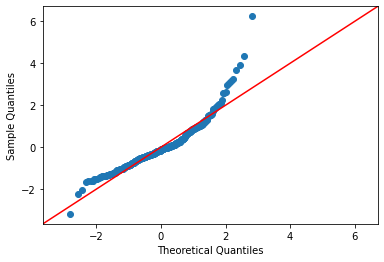

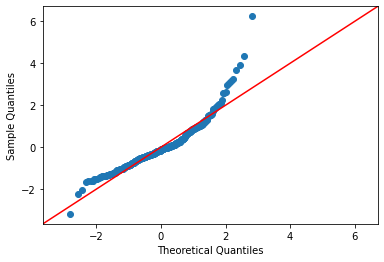

In [60]:
sm.qqplot(Residual,line='45',fit=True)

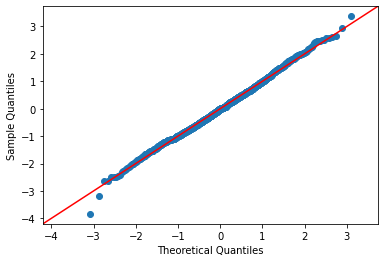

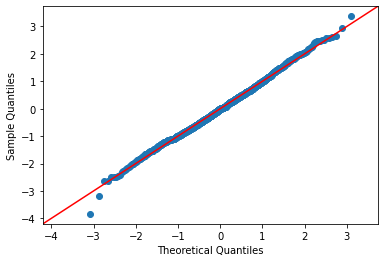

In [61]:
sm.qqplot(array,line='45',fit=True)

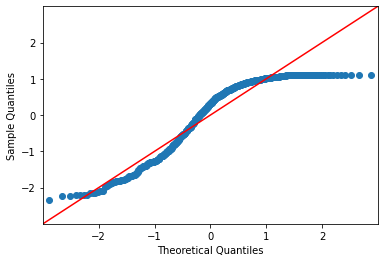

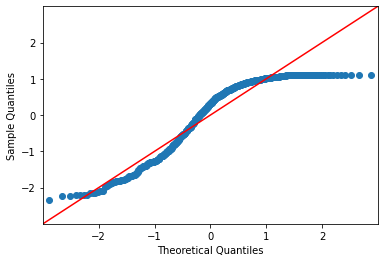

In [62]:
sm.qqplot(boston_df['AGE'],line='45',fit=True)

# 4. Homoscedascticity

In [ ]:
1. Assumption of equal variance
2. HomoScedasticity >>> Constant Error
3. Constant Error >>> constant deviation from zero line
4. dependent variable vs Residual

<AxesSubplot:xlabel='PRICE', ylabel='PRICE'>

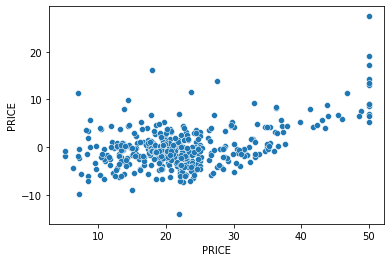

In [63]:
sns.scatterplot(x=y_train,y=Residual)

In [67]:
x_test.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.46,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34


# Testing on user input

In [68]:
x_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [69]:
import pickle

with open('linear_model.pkl','wb') as f:
    pickle.dump(linear_reg_model,f)

In [1]:
CRIM = 0.07758
ZN = 0.0
INDUS=2.78
CHAS =0.0
NOX=0.45
RM=6.58
AGE=19.3
DIS =6.211
RAD=4.0
TAX=560
PTRATIO=17
B=389
LSTAT=7.52

test_array=np.array([CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT],ndmin=2)

def get_predicted_price(test_array):
    pred_price=linear_reg_model.predict(test_array)[0]
    pred_price=np.around(pred_price,2)
    return pred_price

pred_price=get_predicted_price(test_array)
print(f'Predicted Price is {pred_price} $')


NameError: name 'np' is not defined